#**Dogs vs. Cats**

##**Overview**


## **Description**
In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

![Description](https://storage.googleapis.com/kaggle-media/competitions/kaggle/3362/media/woof_meow.jpg)



           Deep Blue beat Kasparov at chess in 1997.

    Watson beat the brightest trivia minds at Jeopardy in 2011.

        Can you tell Fido from Mittens in 2013?



##**The Asirra data set**
Web services are often protected with a challenge that's supposed to be easy for people to solve, but difficult for computers. Such a challenge is often called a CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) or HIP (Human Interactive Proof). HIPs are used for many purposes, such as to reduce email and blog spam and prevent brute-force attacks on web site passwords.

Asirra (Animal Species Image Recognition for Restricting Access) is a HIP that works by asking users to identify photographs of cats and dogs. This task is difficult for computers, but studies have shown that people can accomplish it quickly and accurately. Many even think it's fun! Here is an example of the Asirra interface:

Asirra is unique because of its partnership with Petfinder.com, the world's largest site devoted to finding homes for homeless pets. They've provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. Kaggle is fortunate to offer a subset of this data for fun and research.

##**Image recognition attacks**
While random guessing is the easiest form of attack, various forms of image recognition can allow an attacker to make guesses that are better than random. There is enormous diversity in the photo database (a wide variety of backgrounds, angles, poses, lighting, etc.), making accurate automatic classification difficult. In an informal poll conducted many years ago, computer vision experts posited that a classifier with better than 60% accuracy would be difficult without a major advance in the state of the art. For reference, a 60% classifier improves the guessing probability of a 12-image HIP from 1/4096 to 1/459.

##**State of the art**
The current literature suggests machine classifiers can score above 80% accuracy on this task [1]. Therfore, Asirra is no longer considered safe from attack.  We have created this contest to benchmark the latest computer vision and deep learning approaches to this problem. Can you crack the CAPTCHA? Can you improve the state of the art? Can you create lasting peace between cats and dogs?

Okay, we'll settle for the former.



##**Acknowledgements**
We extend our thanks to Microsoft Research for providing the data for this competition.

* Jeremy Elson, John R. Douceur, Jon Howell, Jared Saul, Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization, in Proceedings of 14th ACM Conference on Computer and Communications Security (CCS), Association for Computing Machinery, Inc., Oct. 2007

#**Extracting Dataset using Kaggle API**

In [2]:
# Install the Kaggle Library
!pip install Kaggle

In [3]:
# Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Install necessary Libraries**

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub keras

In [53]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


#**Import the Libraries**

In [4]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

#**Importing the Datasets from Kaggle**

In [5]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

dogs-vs-cats.zip  resized_images  sampleSubmission.csv	train
kaggle.json	  sample_data	  test1.zip		train.zip


In [7]:
# Extracting the compressed dataset
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
# Counting the number of files in train folder
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of Images:", file_count)

Number of Images: 25000


**Printing the name of Images**

In [10]:
# Printing the name of images
for i in os.listdir("/content/train"):
  print(i)

cat.7136.jpg
dog.5675.jpg
cat.8463.jpg
cat.11990.jpg
cat.4554.jpg
dog.9221.jpg
dog.6207.jpg
dog.8993.jpg
dog.11739.jpg
cat.1372.jpg
cat.6331.jpg
dog.666.jpg
cat.7085.jpg
dog.4482.jpg
dog.10104.jpg
dog.10955.jpg
cat.9595.jpg
dog.12303.jpg
cat.6473.jpg
cat.11992.jpg
cat.5942.jpg
cat.339.jpg
dog.3026.jpg
cat.2309.jpg
dog.4381.jpg
dog.7550.jpg
dog.1772.jpg
cat.6944.jpg
cat.9148.jpg
cat.2861.jpg
dog.11795.jpg
cat.1638.jpg
dog.1285.jpg
cat.10755.jpg
cat.7325.jpg
cat.5347.jpg
cat.1960.jpg
cat.7595.jpg
cat.5763.jpg
dog.2408.jpg
cat.8762.jpg
cat.2229.jpg
cat.12112.jpg
dog.5691.jpg
cat.419.jpg
cat.6164.jpg
cat.6930.jpg
dog.2181.jpg
cat.4651.jpg
cat.7939.jpg
cat.6145.jpg
dog.12440.jpg
cat.579.jpg
cat.2034.jpg
dog.10459.jpg
cat.7053.jpg
cat.1182.jpg
cat.7944.jpg
dog.10509.jpg
cat.8755.jpg
dog.4623.jpg
cat.4360.jpg
cat.10592.jpg
dog.8994.jpg
cat.11070.jpg
cat.9102.jpg
dog.8250.jpg
dog.11773.jpg
cat.2427.jpg
cat.3012.jpg
dog.9743.jpg
cat.3.jpg
cat.7908.jpg
dog.667.jpg
cat.9475.jpg
cat.7388.jpg
cat.7

In [11]:
# Printing the name of images
file_names = os.listdir("/content/train")
print(file_names)

['cat.7136.jpg', 'dog.5675.jpg', 'cat.8463.jpg', 'cat.11990.jpg', 'cat.4554.jpg', 'dog.9221.jpg', 'dog.6207.jpg', 'dog.8993.jpg', 'dog.11739.jpg', 'cat.1372.jpg', 'cat.6331.jpg', 'dog.666.jpg', 'cat.7085.jpg', 'dog.4482.jpg', 'dog.10104.jpg', 'dog.10955.jpg', 'cat.9595.jpg', 'dog.12303.jpg', 'cat.6473.jpg', 'cat.11992.jpg', 'cat.5942.jpg', 'cat.339.jpg', 'dog.3026.jpg', 'cat.2309.jpg', 'dog.4381.jpg', 'dog.7550.jpg', 'dog.1772.jpg', 'cat.6944.jpg', 'cat.9148.jpg', 'cat.2861.jpg', 'dog.11795.jpg', 'cat.1638.jpg', 'dog.1285.jpg', 'cat.10755.jpg', 'cat.7325.jpg', 'cat.5347.jpg', 'cat.1960.jpg', 'cat.7595.jpg', 'cat.5763.jpg', 'dog.2408.jpg', 'cat.8762.jpg', 'cat.2229.jpg', 'cat.12112.jpg', 'dog.5691.jpg', 'cat.419.jpg', 'cat.6164.jpg', 'cat.6930.jpg', 'dog.2181.jpg', 'cat.4651.jpg', 'cat.7939.jpg', 'cat.6145.jpg', 'dog.12440.jpg', 'cat.579.jpg', 'cat.2034.jpg', 'dog.10459.jpg', 'cat.7053.jpg', 'cat.1182.jpg', 'cat.7944.jpg', 'dog.10509.jpg', 'cat.8755.jpg', 'dog.4623.jpg', 'cat.4360.jpg',

#**Display the Images of Cats and Dogs**

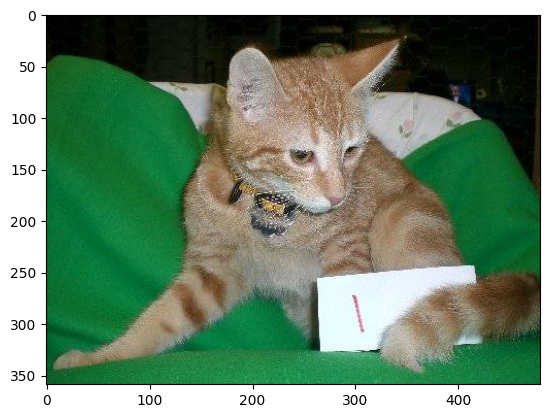

In [12]:
# Display the cat image
img = mpimg.imread('/content/train/cat.7517.jpg')
imgplot = plt.imshow(img)
plt.show()

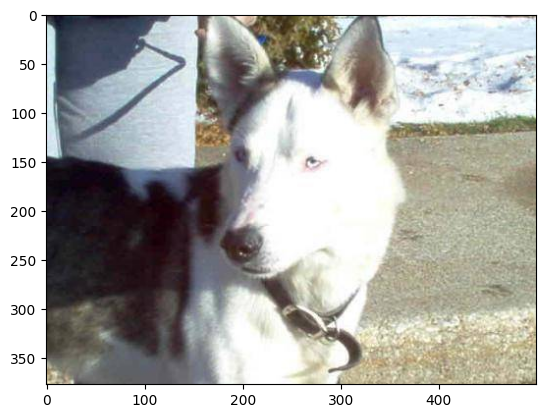

In [13]:
# Display the dog image
img = mpimg.imread('/content/train/dog.5233.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
# Checking the number of Cats Images
for i in os.listdir("/content/train"):
  if i.startswith("cat"):
    print(i)

cat.7136.jpg
cat.8463.jpg
cat.11990.jpg
cat.4554.jpg
cat.1372.jpg
cat.6331.jpg
cat.7085.jpg
cat.9595.jpg
cat.6473.jpg
cat.11992.jpg
cat.5942.jpg
cat.339.jpg
cat.2309.jpg
cat.6944.jpg
cat.9148.jpg
cat.2861.jpg
cat.1638.jpg
cat.10755.jpg
cat.7325.jpg
cat.5347.jpg
cat.1960.jpg
cat.7595.jpg
cat.5763.jpg
cat.8762.jpg
cat.2229.jpg
cat.12112.jpg
cat.419.jpg
cat.6164.jpg
cat.6930.jpg
cat.4651.jpg
cat.7939.jpg
cat.6145.jpg
cat.579.jpg
cat.2034.jpg
cat.7053.jpg
cat.1182.jpg
cat.7944.jpg
cat.8755.jpg
cat.4360.jpg
cat.10592.jpg
cat.11070.jpg
cat.9102.jpg
cat.2427.jpg
cat.3012.jpg
cat.3.jpg
cat.7908.jpg
cat.9475.jpg
cat.7388.jpg
cat.7640.jpg
cat.3553.jpg
cat.3902.jpg
cat.3242.jpg
cat.11558.jpg
cat.3683.jpg
cat.3610.jpg
cat.8354.jpg
cat.10806.jpg
cat.3633.jpg
cat.12413.jpg
cat.7466.jpg
cat.8176.jpg
cat.10933.jpg
cat.1489.jpg
cat.11554.jpg
cat.10741.jpg
cat.6651.jpg
cat.913.jpg
cat.10790.jpg
cat.277.jpg
cat.3836.jpg
cat.9850.jpg
cat.7541.jpg
cat.10791.jpg
cat.2400.jpg
cat.10498.jpg
cat.6709.jpg
cat.1

In [15]:
file_names = os.listdir("/content/train")

for i in range(5):
  name = file_names[i]
  print(name)

cat.7136.jpg
dog.5675.jpg
cat.8463.jpg
cat.11990.jpg
cat.4554.jpg


In [16]:
file_names = os.listdir("/content/train")

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
cat


In [17]:
file_names = os.listdir("/content/train")

cat_count = 0
dog_count = 0

for img_file in file_names:
  img_name = img_file[0:3]
  if img_name == "cat":
    cat_count += 1
  else:
    dog_count += 1

print("Number of Cat Images:", cat_count)
print("Number of Dog Images:", dog_count)

Number of Cat Images: 12500
Number of Dog Images: 12500


In [18]:
# Initialize a counter for cat images
cat_count = 0

# Iterate through files in the directory
for i in os.listdir("/content/train"):
  # Check if the filename starts with "cat"
  if i.startswith("cat"):
    # Increment the counter if it's a cat image
    cat_count += 1

# Print the total count of cat images
print("Number of Cat Images:", cat_count)

Number of Cat Images: 12500


In [19]:
# Initialize a counter for cat images
dog_count = 0

# Iterate through files in the directory
for i in os.listdir("/content/train"):
  # Check if the filename starts with "cat"
  if i.startswith("dog"):
    # Increment the counter if it's a cat image
    dog_count += 1

# Print the total count of cat images
print("Number of Dog Images:", dog_count)

Number of Dog Images: 12500


**Resizing all the Images**

In [22]:
# Creating a directory for resized Images
os.mkdir("/content/resized_images")

In [23]:
original_folder = "/content/train/"
resized_folder = "/content/resized_images/"

for i in range(3000):

  filename = os.listdir(original_folder)[i]
  image_path = original_folder+filename

  img = Image.open(image_path)
  img = img.resize((224, 224))
  img.convert("RGB")

  new_image_path = resized_folder+filename
  img.save(new_image_path)

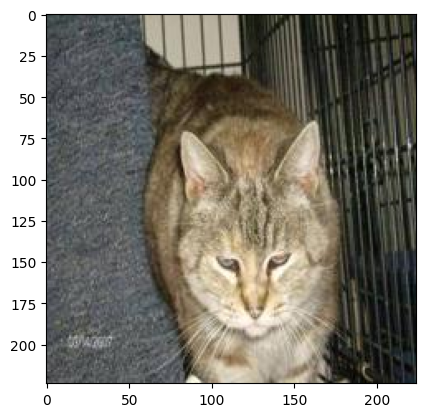

In [24]:
# Display the resized cat image
img = mpimg.imread('/content/resized_images/cat.8463.jpg')
imgplot = plt.imshow(img)
plt.show()

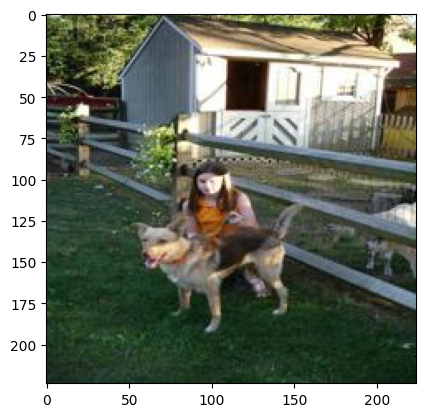

In [25]:
# Display the resized dog image
img = mpimg.imread('/content/resized_images/dog.5675.jpg')
imgplot = plt.imshow(img)
plt.show()

**Creating labels for resized images for dogs and cats**

*  **Cat ---> 0**
*  **Dog ---> 1**

In [26]:
# Creating a for loop to assign labels to resized images
file_names = os.listdir("/content/resized_images")

labels = []

for i in range(3000):

  img_name = file_names[i]
  if img_name[0:3] == "cat":
    labels.append(0)
  else:
    labels.append(1)

In [27]:
print(file_names[0:10])
print(len(file_names))

['cat.7136.jpg', 'dog.5675.jpg', 'cat.8463.jpg', 'cat.11990.jpg', 'cat.4554.jpg', 'dog.9221.jpg', 'dog.6207.jpg', 'dog.8993.jpg', 'dog.11739.jpg', 'cat.1372.jpg']
3000


In [28]:
print(labels[0:10])
print(len(labels))

[0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
3000


In [29]:
# Counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print (counts)

[0 1]
[1478 1522]


In [30]:
# Counting the images of dogs and cats out of 5000 images
cat_count = 0
dog_count = 0

for i in labels:
  if i == 0:
    cat_count += 1
  else:
    dog_count += 1

print("Number of Cat Images:", cat_count)
print("Number of Dog Images:", dog_count)

Number of Cat Images: 1478
Number of Dog Images: 1522


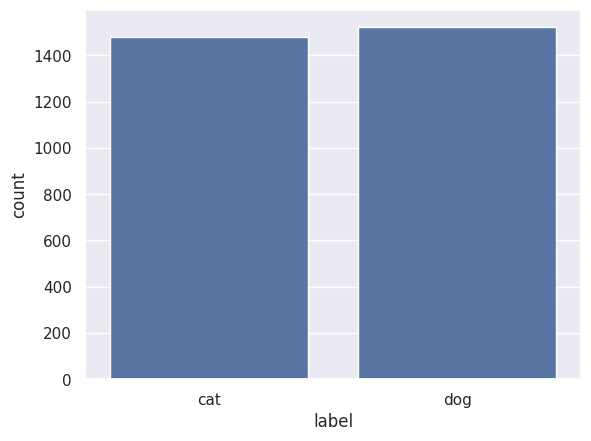

In [31]:
 # Plotting a plot distribution for cat and dogs from the 5000 images
sns.set()
# Create a Pandas DataFrame from the labels list
df = pd.DataFrame({'label': labels})
# Map the numerical labels to 'cat' and 'dog'
df['label'] = df['label'].map({0: 'cat', 1: 'dog'})
# Now use the DataFrame in countplot
sns.countplot(x='label', data=df)
plt.show() # Add this line to display the plot

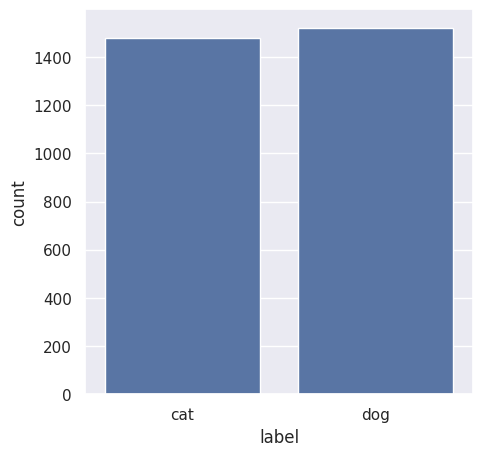

In [32]:
plot = plt.figure(figsize=(5,5))
# Use the 'label' column for x-axis and count for the y-axis
# The estimator argument is set to 'count' (default) to calculate the frequency of each label.
sns.countplot(data=df, x='label')
plt.show()

**Converting all the resized images to numpy arrays**

In [33]:
import cv2
import glob

In [34]:
# Specify the directory where images are stored
image_directory = "/content/resized_images/"

# Define supported image formats
image_extension = ["png", "jpg"]

# Initialize an empty list to store image file paths
files = []

# Search for image files in the directory and add them to the list
[files.extend(glob.glob(image_directory + "*." + e)) for e in image_extension]

# Check if images were found
if not files:
    print("No images found in the directory.")
else:
    # Read images using OpenCV and convert to a NumPy array
    dog_cat_images = np.array([cv2.imread(file) for file in files])

    # Print the shape of the resulting array (if images are the same size)
    print("Loaded images shape:", dog_cat_images.shape)

Loaded images shape: (3000, 224, 224, 3)


In [35]:
print(dog_cat_images)

[[[[171 180 193]
   [168 177 190]
   [166 175 188]
   ...
   [ 35  36  50]
   [ 52  57  72]
   [ 83  91 108]]

  [[175 184 197]
   [173 182 195]
   [170 179 192]
   ...
   [ 34  34  46]
   [ 48  53  68]
   [ 76  85  99]]

  [[178 187 200]
   [178 187 200]
   [176 185 198]
   ...
   [ 31  33  41]
   [ 39  45  56]
   [ 63  71  84]]

  ...

  [[220 218 224]
   [221 219 225]
   [220 218 224]
   ...
   [151 154 158]
   [151 154 158]
   [151 154 158]]

  [[222 220 226]
   [219 217 223]
   [216 214 220]
   ...
   [152 156 161]
   [152 156 161]
   [151 155 160]]

  [[222 220 226]
   [217 215 221]
   [213 211 217]
   ...
   [153 157 162]
   [153 157 162]
   [153 157 162]]]


 [[[101 136 126]
   [125 159 148]
   [152 184 173]
   ...
   [206 206 194]
   [255 255 242]
   [189 184 169]]

  [[105 142 132]
   [108 146 134]
   [123 157 146]
   ...
   [193 194 184]
   [246 243 229]
   [251 248 234]]

  [[ 75 118 107]
   [ 91 135 122]
   [110 150 138]
   ...
   [217 220 211]
   [255 255 248]
   [255 255

In [36]:
type(dog_cat_images)

numpy.ndarray

In [37]:
X = dog_cat_images
y = np.asarray(labels)

# **Splitting the Dataset into Training and Test Sets**

In [38]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")



Dataset split completed:
Total samples: 3000, Training samples: 2250, Test samples: 750


In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(3000, 224, 224, 3)
(2250, 224, 224, 3)
(750, 224, 224, 3)


* **3750 --> Training Images**
* **1250 --> Test Images**

In [40]:
# Normalization (Scaling the values to be in range of 0 - 1)
X_train_norm = X_train / 255.0

X_test_norm = X_test / 255.0

In [41]:
print(X_train_norm)

[[[[0.2745098  0.40784314 0.54901961]
   [0.25098039 0.38431373 0.5254902 ]
   [0.25098039 0.36862745 0.50588235]
   ...
   [0.43529412 0.5254902  0.62745098]
   [0.43137255 0.52156863 0.62352941]
   [0.42745098 0.51764706 0.61960784]]

  [[0.24313725 0.37647059 0.51764706]
   [0.22352941 0.35686275 0.49803922]
   [0.23137255 0.34901961 0.48627451]
   ...
   [0.42352941 0.51372549 0.61568627]
   [0.41960784 0.50980392 0.61176471]
   [0.41568627 0.50588235 0.60784314]]

  [[0.23529412 0.36862745 0.50980392]
   [0.22352941 0.35686275 0.49803922]
   [0.23529412 0.35294118 0.49019608]
   ...
   [0.42352941 0.51372549 0.61568627]
   [0.41568627 0.50588235 0.60784314]
   [0.41568627 0.50588235 0.60784314]]

  ...

  [[0.64705882 0.51372549 0.41960784]
   [0.63137255 0.50980392 0.42745098]
   [0.61568627 0.51372549 0.44705882]
   ...
   [0.74117647 0.8627451  0.95294118]
   [0.72156863 0.84705882 0.9372549 ]
   [0.70980392 0.83529412 0.9254902 ]]

  [[0.65882353 0.5254902  0.43529412]
   [0.6

# **Building the Neural Network**

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [45]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,

    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [48]:
history = model.fit(X_train_norm, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
57/57 [==============================] - 59s 910ms/step - loss: 0.2038 - accuracy: 0.9133 - val_loss: 0.0908 - val_accuracy: 0.9689
Epoch 2/10
57/57 [==============================] - 52s 924ms/step - loss: 0.0705 - accuracy: 0.9756 - val_loss: 0.0703 - val_accuracy: 0.9733
Epoch 3/10
57/57 [==============================] - 50s 883ms/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0739 - val_accuracy: 0.9778
Epoch 4/10
57/57 [==============================] - 50s 888ms/step - loss: 0.0488 - accuracy: 0.9822 - val_loss: 0.0683 - val_accuracy: 0.9756
Epoch 5/10
57/57 [==============================] - 50s 883ms/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 0.0656 - val_accuracy: 0.9800
Epoch 6/10
57/57 [==============================] - 50s 877ms/step - loss: 0.0303 - accuracy: 0.9928 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 7/10
57/57 [==============================] - 50s 876ms/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0661 - val_accuracy: 0.9844

<function matplotlib.pyplot.show(close=None, block=None)>

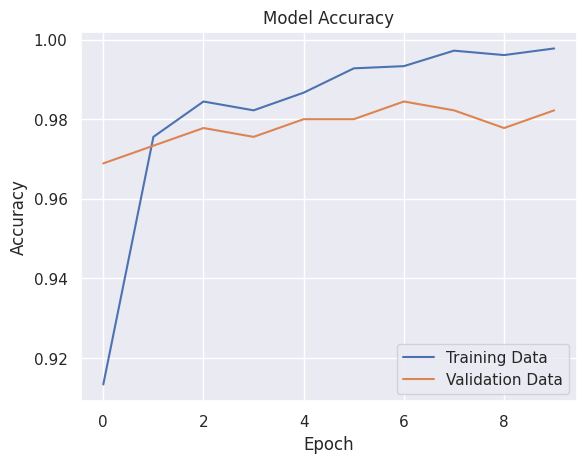

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

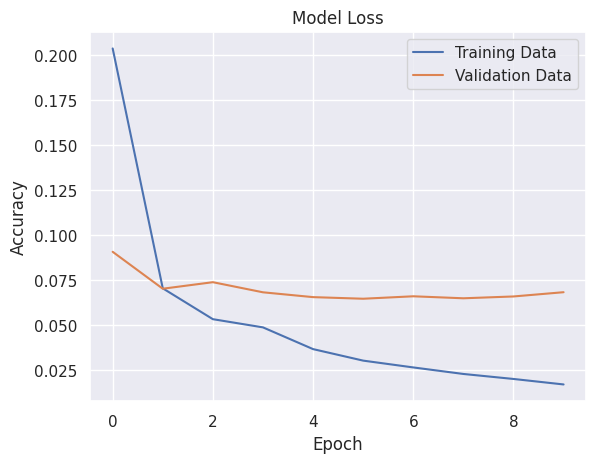

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show

In [51]:
loss, accuracy = model.evaluate(X_test_norm, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

24/24 [==============================] - 20s 842ms/step - loss: 0.0592 - accuracy: 0.9720
Test Loss: 0.0592
Test Accuracy: 0.9720


In [61]:
model = model.save("trained_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Predictive System**

Path of the image to be predicted: /content/cats1.jpg


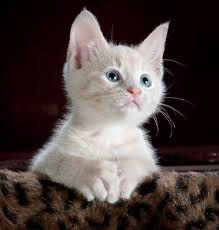

1/1 [==============================] - 1s 788ms/step
[[ 6.367229  -6.7151704]]
0
The image representation is a cat


In [52]:
# Enter the path of Image
input_image_path = input("Path of the image to be predicted: ")

# Read the image entered
input_image = cv2.imread(input_image_path)

# Display the Image
cv2_imshow(input_image)

# Resize the image to 224x224 pixels
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalization (Scaling the values to be in range of 0 - 1)
input_image_scaled = input_image_resize / 255

# Reshaping the image
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predicting the image
input_prediction = model.predict(image_reshaped)

# Get the class label with the highest probability
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image representation is a cat")
else:
  print("The image representation is a dog")

Path of the image to be predicted: /content/dogs1.jpg


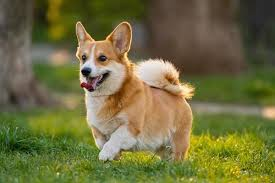

1/1 [==============================] - 0s 79ms/step
[[-1.7776641  2.0517   ]]
1
The image representation is a dog


In [55]:
# Enter the path of Image
input_image_path = input("Path of the image to be predicted: ")

# Read the image entered
input_image = cv2.imread(input_image_path)

# Display the Image
cv2_imshow(input_image)

# Resize the image to 224x224 pixels
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalization (Scaling the values to be in range of 0 - 1)
input_image_scaled = input_image_resize / 255

# Reshaping the image
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predicting the image
input_prediction = model.predict(image_reshaped)

# Get the class label with the highest probability
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image representation is a cat")
else:
  print("The image representation is a dog")

Path of the image to be predicted: /content/cats2.jpg


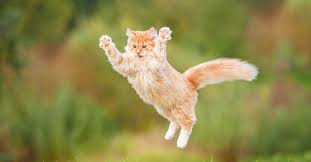

1/1 [==============================] - 0s 65ms/step
[[ 1.1013565 -0.4198663]]
0
The image representation is a cat


In [60]:
# Enter the path of Image
input_image_path = input("Path of the image to be predicted: ")

# Read the image entered
input_image = cv2.imread(input_image_path)

# Display the Image
cv2_imshow(input_image)

# Resize the image to 224x224 pixels
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalization (Scaling the values to be in range of 0 - 1)
input_image_scaled = input_image_resize / 255

# Reshaping the image
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predicting the image
input_prediction = model.predict(image_reshaped)

# Get the class label with the highest probability
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image representation is a cat")
else:
  print("The image representation is a dog")

Path of the image to be predicted: /content/dogs2.jpg


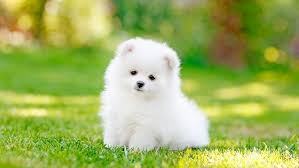

1/1 [==============================] - 0s 35ms/step
[[-2.1103055  2.8635402]]
1
The image representation is a dog


In [58]:
# Enter the path of Image
input_image_path = input("Path of the image to be predicted: ")

# Read the image entered
input_image = cv2.imread(input_image_path)

# Display the Image
cv2_imshow(input_image)

# Resize the image to 224x224 pixels
input_image_resize = cv2.resize(input_image, (224, 224))

# Normalization (Scaling the values to be in range of 0 - 1)
input_image_scaled = input_image_resize / 255

# Reshaping the image
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predicting the image
input_prediction = model.predict(image_reshaped)

# Get the class label with the highest probability
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image representation is a cat")
else:
  print("The image representation is a dog")

In [54]:
import gradio as gr

In [66]:
from tensorflow.keras.models import load_model

# Define a dictionary mapping the custom layer name to its implementation
custom_objects = {'KerasLayer': hub.KerasLayer}

In [68]:
# Load the trained model using 'custom_objects'
model = load_model("trained_model.h5", custom_objects=custom_objects)  # Ensure your model is saved and available

In [69]:
def predict_image(input_image):
    """Predict if the uploaded image is a cat or a dog."""

    # Convert image to OpenCV format (BGR)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)

    # Resize the image to 224x224 pixels
    input_image_resize = cv2.resize(input_image, (224, 224))

    # Normalize pixel values (scale between 0 - 1)
    input_image_scaled = input_image_resize / 255.0

    # Reshape the image to match the model's expected input shape
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the class
    input_prediction = model.predict(image_reshaped)

    # Get the class label with the highest probability
    input_pred_label = np.argmax(input_prediction)

    # Define class labels
    class_labels = ["Cat", "Dog"]

    return f"The image representation is a {class_labels[input_pred_label]}"

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),  # Accepts image input
    outputs="text",  # Outputs text classification
    title="🐱🐶 Cat vs Dog Classifier",
    description="Upload an image of a cat or a dog, and the model will classify it."
)

# Launch the Gradio App
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e64baf39fbe4a2ca9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [71]:
def predict_image(input_image):
    """Predict if the uploaded image is a cat or a dog."""

    # Convert image to OpenCV format (BGR)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)

    # Resize the image to 224x224 pixels
    input_image_resize = cv2.resize(input_image, (224, 224))

    # Normalize pixel values (scale between 0 - 1)
    input_image_scaled = input_image_resize / 255.0

    # Reshape the image to match the model's expected input shape
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the class
    input_prediction = model.predict(image_reshaped)

    # Get the class label with the highest probability
    input_pred_label = np.argmax(input_prediction)

    # Define class labels
    class_labels = ["Cat", "Dog"]

    return f"The image representation is a {class_labels[input_pred_label]}"

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),  # Accepts image input
    outputs="text",  # Outputs text classification
    title="🐱🐶 Cat vs Dog Classifier",
    description="Upload an image of a cat or a dog, and the model will classify it."
)

# Launch the Gradio App
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0247934f6ff0eaaab7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
